In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
from matplotlib import colors
from matplotlib.cm import get_cmap
from plot_utils import set_size
from matplotlib.patches import Patch

In [2]:
plt.rcParams['font.size'] = 8                  
plt.rcParams['lines.linewidth'] = 1           
plt.rcParams['lines.markersize'] = 3
plt.rcParams['figure.figsize'] = set_size(252,subplots=(1,1))
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 1.
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 1.
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['xtick.major.pad']=1.5
plt.rcParams['ytick.major.pad']=1.5
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.handlelength'] = plt.rcParams['legend.handleheight']
plt.rcParams['legend.columnspacing'] = 0.8
plt.rcParams['legend.handletextpad'] = 0.4

plt.rcParams['axes.linewidth'] = 0.5
max_deg = 7
cmap = get_cmap('CMRmap')

fmt = 'eps'

/tmp/ipykernel_14000/1801062577.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('CMRmap')


In [3]:
std_data = np.genfromtxt('../data/stds/stds.dat')
stds = std_data[:,1:].T
phis = std_data[:,0]

sigmas = np.arange(0,20)

gamma_beta = [(20,0.4),(60,0.4),(180,0.4),(60,0.2),(60,0.8)]
gb_idcs = {(20,0.4):0,(60,0.4):1,(180,0.4):2,(60,0.2):3,(60,0.8):4}


test_length = '5e4'

gamma1 = 180
beta1 = 0.4
phi1 = 687

gamma2 = 60
beta2 = 0.4
phi2 = 687

gamma3 = 60
beta3 = 0.8
phi3 = 50

stds1 = stds[gb_idcs[(gamma1,beta1)]]
stds2 = stds[gb_idcs[(gamma2,beta2)]]
stds3 = stds[gb_idcs[(gamma3,beta3)]]

Text(100, [369.02144], '$\\gamma=60, \\beta = $0.8')

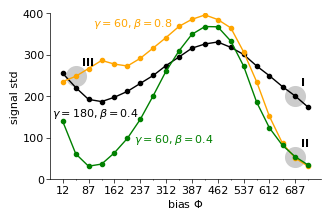

In [4]:
if fmt == 'pdf':
    raster = True
    dpi = 300
elif fmt == 'eps':
    raster = False
    dpi = None
    
fig = plt.figure()

# signal standard deviations
ax_stds = fig.add_subplot(111)

# workaround for transparency in eps format
ax_stds.scatter(phi1,stds1[phis == phi1],s=200,color=(0.80078431, 0.80078431, 0.80078431),rasterized=raster,zorder=-1)
ax_stds.scatter(phi2,stds2[phis == phi2],s=200,color=(0.80078431, 0.80078431, 0.80078431),rasterized=raster,zorder=-1)
ax_stds.scatter(phi3,stds3[phis == phi3],s=200,color=(0.80078431, 0.80078431, 0.80078431),rasterized=raster,zorder=-1)

data_colors = np.linspace(0,0.7,3)
linecolors = cmap(data_colors)
ax_stds.plot(phis,stds1,marker='o',label=r'$\gamma='+str(gamma1)+r', \beta = $'+str(beta1),color='black',rasterized=raster,zorder=1)
ax_stds.plot(phis,stds2,marker='o',label=r'$\gamma='+str(gamma2)+r', \beta = $'+str(beta2),color='green',rasterized=raster,zorder=3)
ax_stds.plot(phis,stds3,marker='o',label=r'$\gamma='+str(gamma3)+r', \beta = $'+str(beta3),color='orange',rasterized=raster,zorder=2)

tickstep_stds = 2
ax_stds.set_ylabel('signal std',labelpad=2)
ax_stds.set_xlabel('bias '+r'$\Phi$',labelpad=1)
ax_stds.set_xticks(phis[::tickstep_stds])
ax_stds.set_xticks(phis,minor=True)
ax_stds.set_ylim([0,400])
ax_stds.set_yticks(np.arange(0,500,100))

ax_stds.annotate(r'$\mathbf{I}$',(phi1,stds1[phis == phi1]),xytext=(phi1+15,stds1[phis == phi1]+25))
ax_stds.annotate(r'$\mathbf{II}$',(phi2,stds2[phis == phi2]),xytext=(phi2+15,stds2[phis == phi2]+25))
ax_stds.annotate(r'$\mathbf{III}$',(phi3,stds3[phis == phi3]),xytext=(phi3+15,stds3[phis == phi3]+25))

# removing spines
ax_stds.spines['top'].set_visible(False)
ax_stds.spines['top'].set_visible(False)
ax_stds.spines['right'].set_visible(False)
ax_stds.spines['right'].set_visible(False)

handles,labels = ax_stds.get_legend_handles_labels() 

ax_stds.annotate(labels[0],(0,stds1[phis == 12]),xytext=(-20,stds1[phis == 12]-105),color='black',fontsize=8)
ax_stds.annotate(labels[1],(200,stds2[phis == 200]),xytext=(200+20,stds2[phis == 200]-10),color='green',fontsize=8)
ax_stds.annotate(labels[2],(350,stds3[phis == 350]),xytext=(350-250,stds3[phis == 350]),color='orange',fontsize=8)
   
plt.savefig(fmt+'/fig10_standard_deviations.'+fmt, bbox_inches='tight',dpi=dpi)